In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [61]:
df = pd.read_csv('/Users/Brian/Downloads/school_grades_dataset.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## Data Exploration

In [3]:
df.shape

(649, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
famrel,-0.020559,0.024421,0.020256,-0.009521,-0.004127,-0.062645,1.000000,0.129216,0.089707,-0.075767,-0.093511,0.109559,-0.089534,0.048795,0.089588,0.063361
freetime,-0.004910,-0.019686,0.006841,0.000937,-0.068829,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,0.084526,-0.018716,-0.094497,-0.106678,-0.122705
goout,0.112805,0.009536,0.027690,0.057454,-0.075442,0.045078,0.089707,0.346352,1.000000,0.245126,0.388680,-0.015741,0.085374,-0.074053,-0.079469,-0.087641
Dalc,0.134768,-0.007018,0.000061,0.092824,-0.137585,0.105949,-0.075767,0.109904,0.245126,1.000000,0.616561,0.059067,0.172952,-0.195171,-0.189480,-0.204719


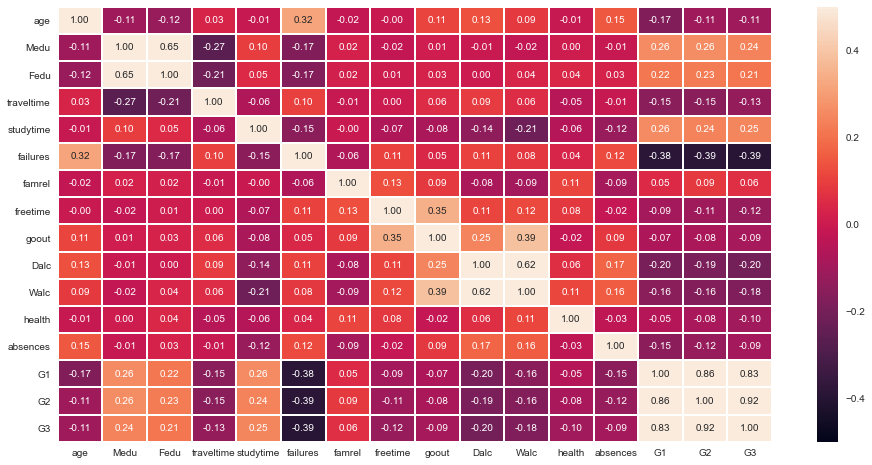

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,lw=1,robust=True,fmt='.2f',vmin=-0.5,vmax=0.5)

## Univariate statistics

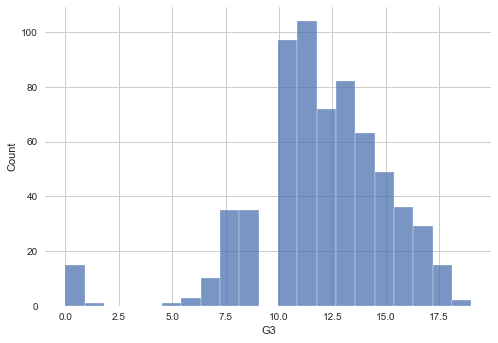

In [33]:
sns.histplot(x=df['G3'])

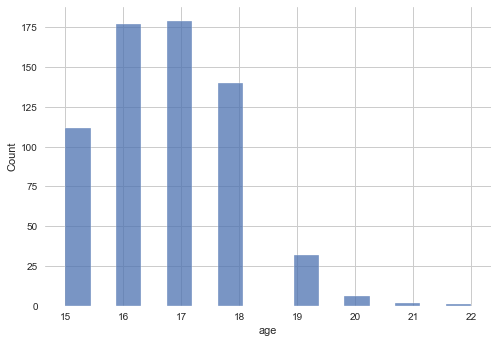

In [38]:
sns.histplot(x=df['age'])

In [ ]:
# add more univariate plots of pairplots

## Data Preprocessing

In [62]:
y=[1 if i >= 10 else 0 for i in df['G3']]
df=df.drop(columns='G3')

In [60]:
print(sum(y), len(y), sum(y)/len(y))

# 85% positive class split somewhat extreme class imbalance, look to deal with imbalanced class

549 649 0.8459167950693375


In [13]:
### Handle missing values
No missing values 

### Handle Categorical variables
One-Hot-Encoding (Dummy Variables)

In [63]:
#get dummies on all categorical variables to create new numerical columns, then drop original columns
categorical_features = df.select_dtypes(include=['object']).columns
X = pd.get_dummies(df[categorical_features], prefix_sep='_')
X = pd.merge(df,X,how='outer',left_index=True,right_index=True)
X = X.drop(categorical_features, axis=1)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,11,1,0,1,0,0,1,1,0,1,0,...,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,1,0,1,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,1,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0


### Scaling

In [64]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
index = X.columns

transformer = scaler.fit_transform(X)
X = pd.DataFrame(transformer, columns = index)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,-0.5,-0.333333,0.333333,-3.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0
1,0.0,-0.5,-0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,-0.333333,0.000000,-0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,-0.5,-0.5,0.0,0.0,0.0,0.0,0.0,-0.5,1.0,0.5,-0.333333,0.666667,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-0.5,0.0,-0.5,0.333333,-0.333333,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
4,-0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.333333,-0.333333,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0


### Binning (Discretization) 
transform continuous variable to fixed number of bins

### Feature engineering

In [16]:
#Interactions and Polynomials 

In [17]:
#Univariate Nonlinear Transformations 

In [18]:
#Automatic Feature Selection - Univariate Statistics, Model-Based Feature Selection, Iterative Feature Selection 

## Fit models and evaluate

In [66]:
# test train split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)
print(x_train.shape, len(y_train), x_test.shape, len(y_test))

(486, 58) 486 (163, 58) 163


In [40]:
#function to evaluate each model
def eval_model(model):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)
    auc_prob_val = roc_auc_score(y_test, probs[:,1])
    accuracy = accuracy_score(y_test, preds)
    print('AUC Score:', auc_prob_val,'\n','Accuracy:', accuracy)
    print('\n','Confusion Matrix','\n',confusion_matrix(y_test, preds))
    print('\n','Classification Report', '\n', classification_report(y_test, preds, digits=3))

### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
#define hyperparameters
solvers = ['newton-cg','lbfgs','liblinear']
penalty = ['l1','l2']
c = [100,10,1,.1,.01]
#define grid search
grid = dict(solver=solvers,penalty=penalty,C=c)
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=reg,param_grid=grid,n_jobs=-1,cv=cv,scoring='f1',error_score=0)
fit = grid_search.fit(x_train,y_train)

eval_model(fit)

AUC Score: 0.9791005291005291 
 Accuracy: 0.9202453987730062

 Confusion Matrix 
 [[ 19   9]
 [  4 131]]

 Classification Report 
               precision    recall  f1-score   support

           0      0.826     0.679     0.745        28
           1      0.936     0.970     0.953       135

    accuracy                          0.920       163
   macro avg      0.881     0.824     0.849       163
weighted avg      0.917     0.920     0.917       163



### Random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#define hyperparameters
n_estimators = [10,100,1000]
max_features = ['sqrt','log2']
#define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=rf,param_grid=grid,n_jobs=-1,cv=cv,scoring='f1',error_score=0)
fit = grid_search.fit(x_train,y_train)

eval_model(fit)

AUC Score: 0.9837301587301587 
 Accuracy: 0.9325153374233128

 Confusion Matrix 
 [[ 18  10]
 [  1 134]]

 Classification Report 
               precision    recall  f1-score   support

           0      0.947     0.643     0.766        28
           1      0.931     0.993     0.961       135

    accuracy                          0.933       163
   macro avg      0.939     0.818     0.863       163
weighted avg      0.933     0.933     0.927       163



### XGBoost

In [74]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb = XGBClassifier()
#define hyperparameters
eta = [.1,.4,.7,1]
min_child_weight = [3,6,10]
max_depth = [.1,1,5,10]
#define grid search
grid = dict(eta=eta,min_child_weight=min_child_weight,max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=xgb,param_grid=grid,n_jobs=-1,cv=cv,scoring='f1',error_score=0)
fit = grid_search.fit(x_train,y_train)
print("Best: %f using %s" % (fit.best_score_, fit.best_params_))
eval_model(fit)

Best: 0.958047 using {'eta': 0.4, 'max_depth': 5, 'min_child_weight': 10}
AUC Score: 0.9735449735449735 
 Accuracy: 0.9263803680981595

 Confusion Matrix 
 [[ 20   8]
 [  4 131]]

 Classification Report 
               precision    recall  f1-score   support

           0      0.833     0.714     0.769        28
           1      0.942     0.970     0.956       135

    accuracy                          0.926       163
   macro avg      0.888     0.842     0.863       163
weighted avg      0.924     0.926     0.924       163



In [79]:
# plot feature importances for tree models